<a href="https://colab.research.google.com/github/chechelan/0-chechelan/blob/main/Week4%265Gender_Recognition_by_Voice_and_Speech_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction

- notebook: in this notebook I will use KNN to predict the variable label (male or female)

- dataset:This database was created to identify a voice as male or female, based upon acoustic properties of the voice and speech. The dataset consists of 3,168 recorded voice samples, collected from male and female speakers. The voice samples are pre-processed by acoustic analysis in R using the seewave and tuneR packages, with an analyzed frequency range of 0hz-280hz (human vocal range).

### Data cleaning

In [1]:
# initiate google drive
from google.colab import drive
drive.mount('/content/gdrive') 

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import seaborn as sns
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #We need this to split the data

In [3]:
df = pd.read_csv('gdrive/My Drive/voice.csv', sep=",")
df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [4]:
# check for null values
df.isnull().any() 

meanfreq    False
sd          False
median      False
Q25         False
Q75         False
IQR         False
skew        False
kurt        False
sp.ent      False
sfm         False
mode        False
centroid    False
meanfun     False
minfun      False
maxfun      False
meandom     False
mindom      False
maxdom      False
dfrange     False
modindx     False
label       False
dtype: bool

there is no 'null' data in the dataset, so in the next analysis i will keep using the original dataframe

### Exploratory data analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [6]:
#check correlation of variables in the dataset
co = round(df.corr(),2)

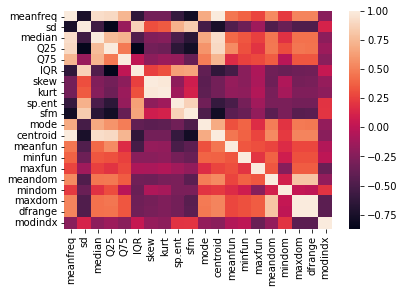

In [7]:
sns.heatmap(co)

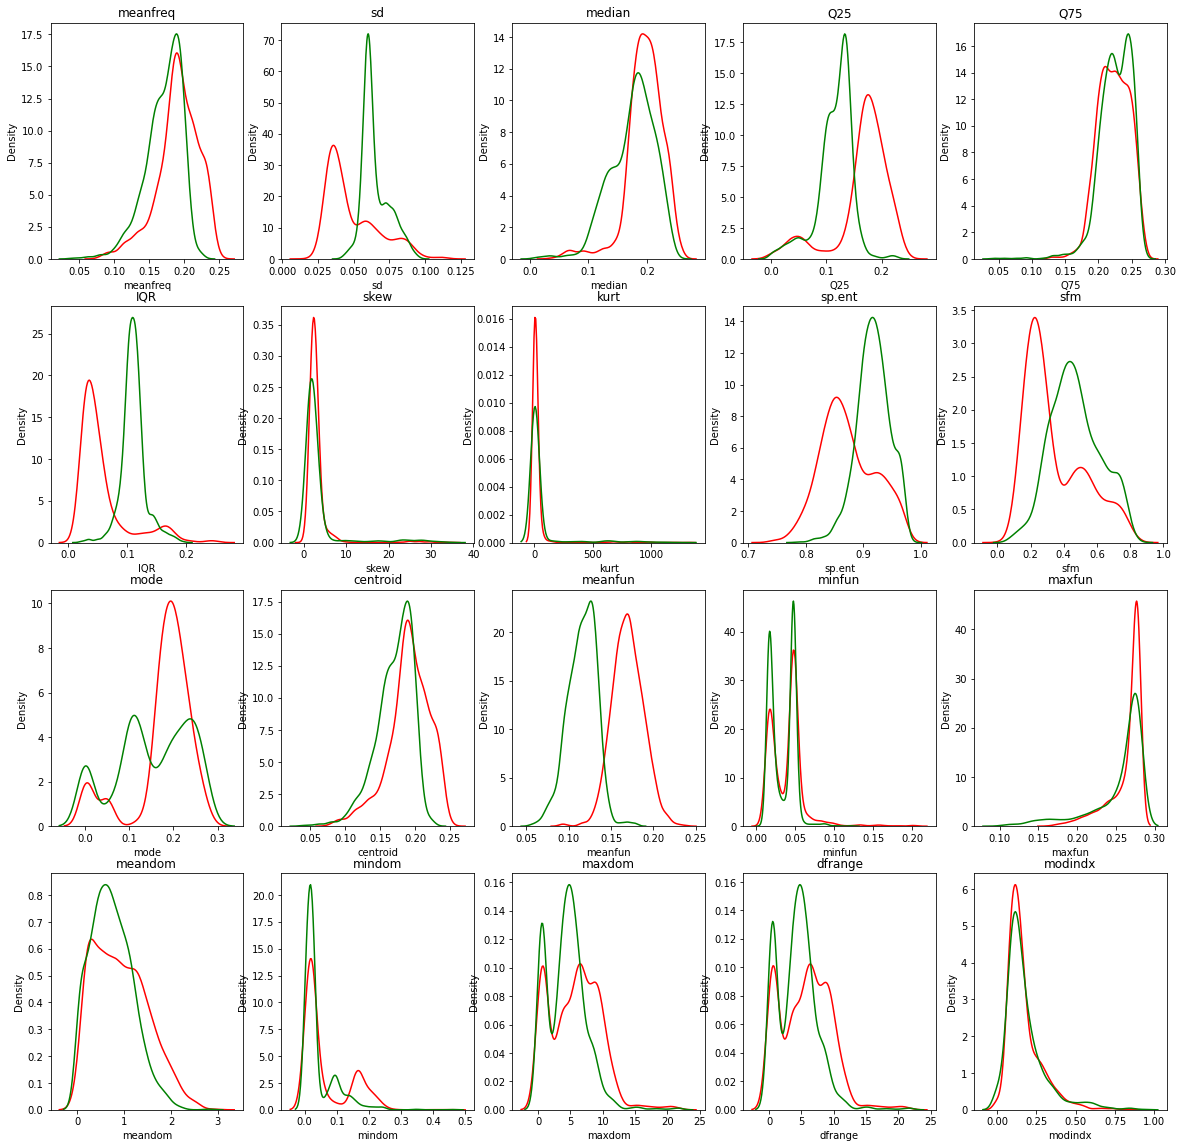

In [8]:
#to check the predicted lable correlation with all variables, then decide which variable to use
plt.subplots(4,5,figsize=(20,20))
for i in range(1,21):
    plt.subplot(4,5,i)
    plt.title(df.columns[i-1])
    sns.kdeplot(df.loc[df['label'] == 'female', df.columns[i-1]], color= 'red', label='F')
    sns.kdeplot(df.loc[df['label'] == 'male', df.columns[i-1]], color= 'green', label='M')

from the above table, i see there are significant difference in sd, Q25, IQR,sp.ent, sfm, mode, maxdom, dfrange, meanfun, so i will use above variables to put into model. 

### Predictive model

I choose k-nearest neighbor for the analysis, is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point.

In [9]:
#sd, Q25, IQR,sp.ent, sfm, mode, maxdom, dfrange, meanfun
X = df[['sd', 'Q25', 'IQR', 'sp.ent', 'sfm','mode','maxdom','dfrange','meanfun']] #create the X matrix

y = df['label'] #create the y-variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, store it into different variables

X_train.head() #show the head of the training set

,sd,Q25,IQR,sp.ent,sfm,mode,maxdom,dfrange,meanfun
1866,0.088698,0.043235,0.174542,0.941751,0.601127,0.225327,3.593750,3.585938,0.174179
767,0.057011,0.106603,0.100853,0.908148,0.420416,0.201264,2.367188,2.359375,0.100181
2862,0.034413,0.223822,0.028535,0.813883,0.166600,0.244331,8.765625,8.742188,0.179095
1064,0.057609,0.138016,0.105827,0.911062,0.322959,0.222677,8.015625,7.992188,0.138659
270,0.071383,0.094235,0.108663,0.940602,0.613985,0.017134,4.750000,4.742188,0.108932


In [10]:
from sklearn.neighbors import KNeighborsClassifier #the object class we need

knn = KNeighborsClassifier(n_neighbors=5) 
knn = knn.fit(X_train, y_train) #this fits the k-nearest neigbor model with the train data

In [11]:
knn.n_samples_fit_

2217

### Evaluation

In [12]:
# Calculate the accuracy, precision and recall. Describe and interpret the results in a Markdown cell.

In [13]:
#accuracy
knn.score(X_test, y_test) #calculate the fit on the *test* data

0.8538380651945321

In [14]:
from sklearn.metrics import confusion_matrix
y_test_pred = knn.predict(X_test) #the predicted values
cm = confusion_matrix(y_test, y_test_pred) #creates a "confusion matrix"
cm

array([[376,  81],
       [ 58, 436]])

In [15]:
knn.classes_

array(['female', 'male'], dtype=object)

In [16]:
conf_matrix = pd.DataFrame(cm, index=['female (actual)', 'male (actual)'], columns = ['female (predicted)', 'male (predicted)']) #make a dataframe, put labels on rows (index) and columns 
conf_matrix

,female (predicted),male (predicted)
female (actual),376,81
male (actual),58,436


In [17]:
#accuracy 

accuracy = (376+436)/(376+436+81+58)
accuracy

0.8538380651945321

In [18]:
#precision female / male 
precisionf= 376/(376+58)
precisionm = 436/(81+436)
print(precisionf)
print(precisionm)

0.8663594470046083
0.8433268858800773


In [19]:
#recall 
recallfemale = 376/(376+81)
recallmale = 436/(436+58)
print(recallfemale)
print(recallmale)

0.8227571115973742
0.8825910931174089


### Conclusion

Accuracy of the model is 85.38%, it means it can predict 85.38% correct in the dataset, but when we see the precision, we can see the female precision is 86.63%, which is higher than male 84.32%, but the difference is not significant. so i think generally the model works well on prediction. 